# NLP Fundamentals

Contents:

- Preparing Text for NLP
    - Regular Expressions (regex)
    - Tokenization
    - Preprocessing Text
        - lowercasing
        - Removing Unwanted Tokens or Stopwords
        - Lemmisation
- Topic Identification
    - Bag-of-Words
    - Tf-idf
- Named Entity Recognition


In [1]:
# Import necessary modules

import re

from nltk import download
#download('punkt')
#download('wordnet')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter, defaultdict

from itertools import chain

## Preparing Text for NLP

### Regex

A _Regular Expression_ is a sequence of characters or a string containing a combination of normal (or regular, ordinary) characters and special metacharacters that define search patterns to find text or positions within a text. While normal characters have literal meaning and match themselves, metacharacters have special meaning and they resresent types of characters, such as `\d` for digits or `\w` for words, or ideas/repetitions.

>Regular expressions use the backslash character ('\') to indicate special forms or to allow special characters to be used without invoking their special meaning. This collides with Python’s usage of the same character for the same purpose in string literals. The solution is to use Python’s raw string notation for regular expression patterns; backslashes are not handled in any special way in a string literal prefixed with `'r'`. So `r"\n"` is a two-character string containing `'\'` and `'n'`, while `"\n"` is a one-character string containing a newline. Usually patterns will be expressed in Python code using this raw string notation. [source](https://docs.python.org/3/library/re.html)

Some of the special characters are shown in below tables.

Metacharacter|Description
---|:---
`.` | Wildcard - Matches any single character except \n.Matches any single character except `\n`
`^` | Matches the start of the string
`$` | Matches the end of the string or just before the newline at the end of the string
`\|` | The OR (choice) operator matches either the expression before or the expression after the operator. For example, `abc\|def` matches "abc" or "def".

**Repetition Quantifiers:**

Metacharacter|Description
---|:---
`*` | Matches the preceding element 0 or more times. `ab*` will match ‘a’, ‘ab’, or ‘a’ followed by any number of ‘b’s
`+` | Matches the preceding element 1 or more times. `ab+` will match ‘a’ followed by any non-zero number of ‘b’s; it will not match just ‘a’
`?` | Causes the resulting RE to match 0 or 1 repetitions of the preceding RE. `ab?` will match either ‘a’ or ‘ab’.
`{m,n}` | Matches the preceding element at least m and not more than n times. For example, `a{3,5}` | Matches only "aaa", "aaaa", and "aaaaa"

**Special Sequences:**

Metacharacter|Description
---|:---
`\w` | Matches alphanumeric characters, which means a-z, A-Z, and 0-9. It also matches the underscore, _.
`\d` | Matches digits, which means 0-9.
`\s` | Matches whitespace characters, which include the \t, \n, \r, and space characters.
`\b` | Matches the boundary (or empty string) at the start and end of a word, that is, between \w and \W.
`\A` | Matches the beginning of a string (but not an internal line).
`\z` | Matches the end of a string (but not an internal line).

**Ranges (Set of Characters):**

Metacharacter|Description
---|:---
`[ ]` | Used to indicate a set of characters. Matches a single character that is contained within the brackets
`[amk]` | Matches either a, m, or k. It does not match `amk`
`[a-z]` | Matches any alphabet from `a` to `z`
`[a\-z]` | Matches a, -, or z. It matches `-` because `\` escapes it
`[a-cx-z]` | Matches a, b, c, x, y, z
`[0-5][0-9]` | Matches all the two-digits numbers from 00 to 59
`[a-]` | Matches a or -, because `-` is not being used to indicate a series of characters
`[-a]` | As above, matches a or -
`[a-z0-9]` | Matches characters from a to z and also from 0 to 9
`[(+*)]` | Special characters become literal inside a set, so this matches (, +, *, and )
`[^ab2]` | Adding ^ excludes any character in the set. Here, it matches characters that are not a, b, or 2

**Groups:**

Metacharacter|Description
---|:---
`( )` | Matches the expression inside the parentheses and groups it. Groups a series of pattern elements to a single element.
`(? )` | Inside parentheses like this, ? acts as an extension notation. Its meaning depends on the character immediately to its right.

In [2]:
my_string = "STRING: There are several sentence endings. One is Period. Another one is Question Mark? Other one is Exclamation Mark! [#Regex is great]"

# Split my_string on sentence endings and print the result
sentence_endings = r"[.?!]"
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

['STRING: There are several sentence endings', ' One is Period', ' Another one is Question Mark', ' Other one is Exclamation Mark', ' [#Regex is great]']
['STRING', 'There', 'One', 'Period', 'Another', 'Question', 'Mark', 'Other', 'Exclamation', 'Mark', 'Regex']
['STRING:', 'There', 'are', 'several', 'sentence', 'endings.', 'One', 'is', 'Period.', 'Another', 'one', 'is', 'Question', 'Mark?', 'Other', 'one', 'is', 'Exclamation', 'Mark!', '[#Regex', 'is', 'great]']
[]


In [3]:
# Search for the first occurrence of "one" in my_string
match = re.search("one", my_string)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in square brackets
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, my_string))

# Find the script notation at the beginning and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, my_string))

67 70
<re.Match object; span=(120, 137), match='[#Regex is great]'>
<re.Match object; span=(0, 7), match='STRING:'>


### Tokenization

Natural Language Toolkit (NLTK) is a platform for building Python programs to work with human language data.

In [4]:
#from nltk.tokenize import sent_tokenize, word_tokenize

# Split scene_one into sentences
sentences = sent_tokenize(my_string)

# Print the sentences
print(sentences)

# Use word_tokenize to tokenize the fourth sentence
tokenized_sent = word_tokenize(sentences[3])

# Print the tokenized sentence
print(tokenized_sent)

# Make a set of unique tokens in the entire scene
unique_tokens = set(word_tokenize(my_string))

# Print the unique tokens result
print(unique_tokens)


['STRING: There are several sentence endings.', 'One is Period.', 'Another one is Question Mark?', 'Other one is Exclamation Mark!', '[#Regex is great]']
['Other', 'one', 'is', 'Exclamation', 'Mark', '!']
{'endings', 'STRING', '[', '.', 'Mark', ':', 'is', 'sentence', 'great', '#', '!', 'are', 'several', 'Question', ']', 'Other', 'There', 'Regex', 'One', 'Period', '?', 'Another', 'Exclamation', 'one'}


In [5]:
# Tokenizer pattern which retains sentence punctuation as seperate tokens. #... remains single token
pattern3 = r"(\w+|#\w+|\?|!|\.)"

print(re.match(pattern3, my_string))

print(re.findall(pattern3, my_string))

<re.Match object; span=(0, 6), match='STRING'>
['STRING', 'There', 'are', 'several', 'sentence', 'endings', '.', 'One', 'is', 'Period', '.', 'Another', 'one', 'is', 'Question', 'Mark', '?', 'Other', 'one', 'is', 'Exclamation', 'Mark', '!', '#Regex', 'is', 'great']


In [6]:
# Tokenizer pattern which retains sentence punctuation as seperate tokens. #. remains single token
pattern3 = r"(\w+|#\w+|\?|!|\.)"

# Tokenize with the pattern
regexp_tokenize(my_string, pattern3)

['STRING',
 'There',
 'are',
 'several',
 'sentence',
 'endings',
 '.',
 'One',
 'is',
 'Period',
 '.',
 'Another',
 'one',
 'is',
 'Question',
 'Mark',
 '?',
 'Other',
 'one',
 'is',
 'Exclamation',
 'Mark',
 '!',
 '#Regex',
 'is',
 'great']

In [7]:
# Regex with NLTK tokenization

tweets = ["Data Science with #python and #rstat @DS now!",
         "Natural Language Processing #NLP with NLTK"]

# Define a regex pattern to find hashtags: pattern1
pattern4 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern4)

['#python', '#rstat']

In [8]:
# Write a pattern that matches both mentions and hashtags
pattern5 = r"([@#]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[1], pattern5)

['#NLP']

In [9]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['Data', 'Science', 'with', '#python', 'and', '#rstat', '@DS', 'now', '!'], ['Natural', 'Language', 'Processing', '#NLP', 'with', 'NLTK']]


Unicode ranges for emoji are:

`('\U0001F300'-'\U0001F5FF')`, `('\U0001F600-\U0001F64F')`, `('\U0001F680-\U0001F6FF')`, and `('\u2600'-\u26FF-\u2700-\u27BF')`.

In [10]:
# Non-ascii tokenization

turkish_text = "Yemeğe gidiyorum? 🍕 İşin var mı? 🚕"

# Tokenize and print all words in german_text
all_words = word_tokenize(turkish_text)
print(all_words)

# Tokenize and print only capital words including thte non-ASCII characters
capital_words = r"[A-Zİ]\w+"
print(regexp_tokenize(turkish_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(turkish_text, emoji))

['Yemeğe', 'gidiyorum', '?', '🍕', 'İşin', 'var', 'mı', '?', '🚕']
['Yemeğe', 'İşin']
['🍕', '🚕']


[[], ['In', 'the', 'past', 'two', 'decades', 'there', 'has', 'been', 'a', 'significant', 'shift', 'in', 'naval', 'missions', 'toward', 'operations', 'other', 'than', 'war'], ['Maritime', 'security', 'operations', 'such', 'as', 'counter', 'piracy', 'maritime', 'interdiction', 'maritime', 'patrol', 'and', 'naval', 'escort', 'are', 'the', 'main', 'focus', 'of', 'most', 'fleets', 'today', 'however', 'the', 'vessels', 'that', 'are', 'currently', 'being', 'used', 'in', 'such', 'operations', 'were', 'mainly', 'built', 'for', 'other', 'purposes'], ['For', 'instance', 'in', 'August', '2009', 'the', 'North', 'Atlantic', 'Council', 'approved', 'Operation', 'Ocean', 'Shield', 'to', 'fight', 'piracy', 'in', 'the', 'Gulf', 'of', 'Aden'], ['Among', 'ships', 'that', 'were', 'assigned', 'in', 'the', 'rotations', 'of', 'this', 'NATO', 'mission', 'many', 'were', 'destroyers', 'and', 'frigates'], ['Although', 'those', 'warships', 'can', 'be', 'used', 'in', 'such', 'missions', 'how', 'reasonable', 'is', 'i

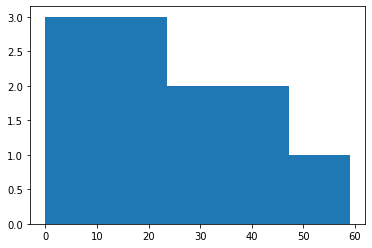

In [11]:
with open('my_string_long.txt') as file:
    my_string_long = file.read()

# Split the script into lines
lines = my_string_long.split('\n')

# Tokenize each line
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]
print(tokenized_lines)

# Make a frequency list of lengths
line_num_words = [len(t_line) for t_line in tokenized_lines]
print(line_num_words)

# Plot a histogram of the line lengths
plt.hist(line_num_words, bins=5)

# Show the plot
plt.show()

### Preprocessing Text

You'll need to lower, remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on your cleaned text.

#### lowercasing

In [12]:
# Tokenize the article
tokens = word_tokenize(my_string)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

print(my_string)
print(lower_tokens)

STRING: There are several sentence endings. One is Period. Another one is Question Mark? Other one is Exclamation Mark! [#Regex is great]
['string', ':', 'there', 'are', 'several', 'sentence', 'endings', '.', 'one', 'is', 'period', '.', 'another', 'one', 'is', 'question', 'mark', '?', 'other', 'one', 'is', 'exclamation', 'mark', '!', '[', '#', 'regex', 'is', 'great', ']']


In [13]:
# Tokenize the article
tokens = word_tokenize(my_string_long)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

#### Removing Unwanted Tokens

In [29]:
english_stops = ['a', 'in', 'and', 'the', 'there', 'is', 'been', 'or', 
                 'has', 'are', 'one', 'is', 'other', 'this', 'these',
                'those', 'that', 'of', 'an', 'it', 'to', 'for', 'be', 'on',
                'such', 'were', 'they', 'their', 'as', 'has', 'vs', 'with']

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

#### Lemmatisation

Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. (In English, for example, run, runs, ran and running are forms of the same lexeme, with "run" as the lemma.)

In [30]:
# Import WordNetLemmatizer
# from nltk.stem import WordNetLemmatizer

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

print(lemmatized)

['past', 'two', 'decade', 'significant', 'shift', 'naval', 'mission', 'toward', 'operation', 'than', 'war', 'maritime', 'security', 'operation', 'maritime', 'interdiction', 'maritime', 'patrol', 'naval', 'escort', 'main', 'focus', 'most', 'fleet', 'today', 'however', 'vessel', 'currently', 'being', 'used', 'operation', 'mainly', 'built', 'purpose', 'instance', 'august', 'north', 'atlantic', 'council', 'approved', 'operation', 'ocean', 'shield', 'fight', 'piracy', 'gulf', 'aden', 'among', 'ship', 'assigned', 'rotation', 'nato', 'mission', 'many', 'destroyer', 'frigate', 'although', 'warship', 'can', 'used', 'mission', 'how', 'reasonable', 'risk', 'destroyer', 'frigate', 'fight', 'terrorist', 'boat', 'pirate', 'capable', 'warship', 'smaller', 'combatant', 'many', 'surface', 'vessel', 'perform', 'maritime', 'security', 'operation', 'nato', 'task', 'force', 'example', 'sophisticated', 'warship', 'capable', 'warfare', 'asuw', 'warfare', 'aaw', 'warfare', 'asw', 'although', 'sophisticated', 

## Topic Identification

### Bag-of-Words

Bag-of-words model can be used to represent the text as the bag of its words. It is mainly used as a tool of feature generation. One of the main properties of the bag-of-words model is that it completely ignores the order of the tokens in the document that is encoded, which is where the name bag-of-words comes from.

#### Bag-of-words Using `Counter`

In [31]:
# Import Counter
# from collections import Counter

# Tokenize the article
tokens = word_tokenize(my_string_long)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 16), ('in', 13), ('the', 9), ('of', 9), ('.', 8), ('a', 7), ('to', 7), ('and', 6), ('that', 6), ('are', 5)]


In [32]:
# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('operation', 5), ('capable', 5), ('maritime', 4), ('vessel', 4), ('used', 4), ('ship', 4), ('warfare', 4), ('mission', 3), ('warship', 3), ('naval', 2)]


#### Bag-of-words Using `gensim`

Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give us insight into relationships between words in a corpus. We can create and query a corpus with `gensim` module.

Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.

Check [gensim](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/gensim%20Quick%20Start.ipynb) for details.

In [19]:
import os

path = "raw-corpus/"

files = os.listdir(path)

raw_corpus = []

# Import text files to generate raw corpus
for file in files:
    if file.endswith(".txt"):
        with open(path + file, 'r') as f:
            raw_corpus.append(f.read())

In [33]:
# Preprocessing text (simple)

# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in english_stops]
         for document in raw_corpus]

Before proceeding, we want to associate each word in the corpus with a unique integer ID. We can do this using the `gensim.corpora.Dictionary` class. This dictionary defines the vocabulary of all words that our processing knows about.

In [34]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles
dictionary = Dictionary(texts)

print(dictionary)

Dictionary(220 unique tokens: ['analysis', 'cleansing,', 'conclusions', 'data', 'decision-making.']...)


Our processed corpus has 223 unique words in it, which means that each document will be represented by a 223-dimensional vector under the bag-of-words model. We can use the dictionary to turn tokenized documents into these 223-dimensional vectors. We can see what these IDs correspond to:

In [35]:
print(dictionary.token2id)

{'analysis': 0, 'cleansing,': 1, 'conclusions': 2, 'data': 3, 'decision-making.': 4, 'discovering': 5, 'goal': 6, 'information,': 7, 'informing': 8, 'inspecting,': 9, 'modeling': 10, 'process': 11, 'supporting': 12, 'transforming': 13, 'useful': 14, '0': 15, '1': 16, '1,': 17, 'between': 18, 'certainty.': 19, 'events': 20, 'glossary': 21, 'impossibility': 22, 'indicates': 23, 'likelihood': 24, 'measure': 25, 'number': 26, 'occur.': 27, 'probability': 28, 'quantifies': 29, 'quantifying': 30, 'see': 31, 'sparsly': 32, 'speaking,': 33, 'statistics.': 34, 'where,': 35, 'will': 36, '"a': 37, '"can': 38, '"computing': 39, '"training': 40, '(as': 41, '1959': 42, '====': 43, 'across': 44, 'alan': 45, 'algorithm': 46, 'algorithms': 47, 'also': 48, 'analytics.': 49, 'application': 50, 'applications,': 51, 'arthur': 52, 'artificial': 53, 'at': 54, 'based': 55, 'being': 56, 'build': 57, 'business': 58, 'by': 59, 'can': 60, 'characteristics': 61, 'class': 62, 'closely': 63, 'cognitive': 64, 'coined

In [36]:
# Select the id for "data"
data_id = dictionary.token2id.get("data")

print("id:", data_id)

# Use data_id with the dictionary to print the word
print("word: ", dictionary.get(data_id))

id: 3
word:  data


We can create the bag-of-word representation for a document using the doc2bow method of the dictionary, which returns a sparse representation of the word counts. The first entry in each tuple corresponds to the ID of the token in the dictionary, the second corresponds to the count of this token. Now, we can convert our entire original corpus to a list of vectors.

In [37]:
# Create a MmCorpus
bow_corpus = [dictionary.doc2bow(text) for text in texts]

# Print the first 10 word ids with their frequency counts from the fourth document
print(bow_corpus[3][:10])

[(3, 1), (128, 1), (167, 2), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (208, 1)]


In [38]:
# Number of documents (texts)
len(bow_corpus)

4

We can even vectorize a phrase, "Data is everywhere", which was not in our original corpus. Note that the word "everywhere" did not occur in the original corpus and so it was not included in the vectorization.

In [39]:
new_text = "Data is everywhere"

# Create the bag-of-word representation for the new_text using the doc2bow method of the dictionary
new_vec = dictionary.doc2bow(new_text.lower().split())

# Print the new_vec
new_vec

[(3, 1)]

In [50]:
# Save the fourth document
doc = bow_corpus[3]

# Sort the doc for frequency
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

bow_doc

[(167, 2),
 (217, 2),
 (3, 1),
 (128, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 1),
 (208, 1),
 (209, 1),
 (210, 1),
 (211, 1),
 (212, 1),
 (213, 1),
 (214, 1),
 (215, 1),
 (216, 1),
 (218, 1),
 (219, 1)]

In [51]:
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

statistical 2
statistics 2
data 1
model 1
analysis, 1


In [52]:
# Create the defaultdict
total_word_count = defaultdict(int)
for word_id, word_count in chain.from_iterable(bow_corpus): #itertools.chain
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

machine 11
learning 8
data 5
algorithms 4
probability 3
